In [1]:
import geopandas as gpd
import pandas as pd
#Next line is so that we can see all columns in table easily. 
pd.pandas.set_option('display.max_columns', None)

In [2]:
leases = gpd.read_file("raw_data/ASLD_-_State_Trust_Parcels/ASLD_-_State_Trust_Parcels.shp")
leases.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    23116 non-null  int64   
 1   landnum     23116 non-null  object  
 2   County      23116 non-null  object  
 3   parcel      23116 non-null  int64   
 4   fundtxt     23116 non-null  object  
 5   open_code   23116 non-null  int64   
 6   leased      23116 non-null  object  
 7   ke          23116 non-null  object  
 8   lease_      23116 non-null  int64   
 9   lse_code    23116 non-null  int64   
 10  lse_seq     23116 non-null  int64   
 11  effdate     19929 non-null  object  
 12  expdate     19929 non-null  object  
 13  perpetual   0 non-null      object  
 14  aus         23116 non-null  float64 
 15  rolodex_    23116 non-null  int64   
 16  full_name   19929 non-null  object  
 17  trs         23116 non-null  object  
 18  legal       23103 non-null  object  
 

In [3]:
leases.geometry[1].contains(leases.geometry[0])

False

In [4]:
leases.iloc[0]

OBJECTID                                                  46243
landnum                                 1   10   28 3  1  31005
County                                                   Apache
parcel                                                     1005
fundtxt                          AGRICULTURE & MECHANICAL CLLGE
open_code                                                     0
leased                                                        Y
ke                                                            5
lease_                                                   104398
lse_code                                                      0
lse_seq                                                       0
effdate                                                20180930
expdate                                                20280929
perpetual                                                  None
aus                                                         0.5
rolodex_                                

In [5]:
wells = pd.read_csv("raw_data/cleaned_well_data.csv")
wells.info()

C:\Users\liamw\AppData\Local\Temp\ipykernel_15916\380604934.py:1: DtypeWarning: Columns (36,45) have mixed types. Specify dtype option on import or set low_memory=False.
  wells = pd.read_csv("raw_data/cleaned_well_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289301 entries, 0 to 289300
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  289301 non-null  int64  
 1   wellid                      289301 non-null  int64  
 2   WLWA_ID                     289301 non-null  int64  
 3   date                        288969 non-null  object 
 4   depth                       275285 non-null  float64
 5   WLWA_WATER_LEVEL_ELEVATION  275285 non-null  float64
 6   WLWA_SOURCE_CODE            283252 non-null  object 
 7   WLWA_METHOD_CODE            272560 non-null  object 
 8   WLWA_REMARK_CODE            24846 non-null   object 
 9   SITE_WELL_ALTITUDE          289301 non-null  float64
 10  SITE_LOCAL_ID               289301 non-null  object 
 11  SITE_LATIT_DEGREE           289301 non-null  int64  
 12  SITE_LATIT_MIN              289301 non-null  int64  
 13  SITE_LATIT_SEC

<Axes: >

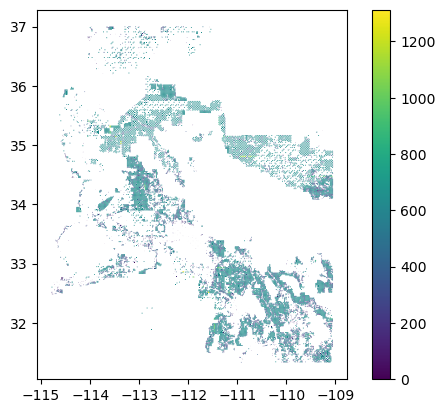

In [6]:
leases.plot("acres", legend = True)

In [7]:
leases.to_csv("our_data/raw_lease_data.csv")

<Axes: >

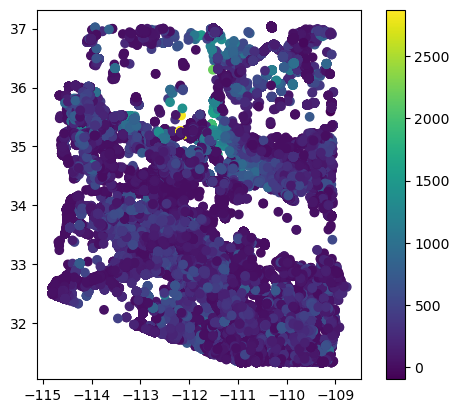

In [8]:
wells['geometry'] = gpd.points_from_xy(
    x=wells.SITE_LONGIT_DECIMAL, 
    y=wells.SITE_LATITUDE_DECIMAL, 
    crs="EPSG:4326"
    )
wells = gpd.GeoDataFrame(data=wells, geometry='geometry')
wells.plot("depth", legend=True)

In [9]:
wells = gpd.GeoDataFrame(data=wells, geometry='geometry')
wells.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 289301 entries, 0 to 289300
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Unnamed: 0                  289301 non-null  int64   
 1   wellid                      289301 non-null  int64   
 2   WLWA_ID                     289301 non-null  int64   
 3   date                        288969 non-null  object  
 4   depth                       275285 non-null  float64 
 5   WLWA_WATER_LEVEL_ELEVATION  275285 non-null  float64 
 6   WLWA_SOURCE_CODE            283252 non-null  object  
 7   WLWA_METHOD_CODE            272560 non-null  object  
 8   WLWA_REMARK_CODE            24846 non-null   object  
 9   SITE_WELL_ALTITUDE          289301 non-null  float64 
 10  SITE_LOCAL_ID               289301 non-null  object  
 11  SITE_LATIT_DEGREE           289301 non-null  int64   
 12  SITE_LATIT_MIN              289301 non-null  int64

In [31]:
merged_data = leases.sjoin(wells, how="left", predicate='contains')
merged_data= merged_data.drop(merged_data[merged_data['leased'] == 'N'].index)
merged_data= merged_data[merged_data['leased'] == 'Y']
merged_data


,OBJECTID,landnum,County,parcel,fundtxt,open_code,leased,ke,lease_,lse_code,lse_seq,effdate,expdate,perpetual,aus,rolodex_,full_name,trs,legal,acres,link,total_aus,Shape__Are,Shape__Len,geometry,index_right,Unnamed: 0,wellid,WLWA_ID,date,depth,WLWA_WATER_LEVEL_ELEVATION,WLWA_SOURCE_CODE,WLWA_METHOD_CODE,WLWA_REMARK_CODE,SITE_WELL_ALTITUDE,SITE_LOCAL_ID,SITE_LATIT_DEGREE,SITE_LATIT_MIN,SITE_LATIT_SEC,SITE_LONGIT_DEGREE,SITE_LONGIT_MIN,SITE_LONGIT_SEC,SITE_ALTMETH_CODE_ENTRY,basinid,SITE_SISRC_CODE,SITE_SITTYP_CODE_ENTRY,SITE_USE_1,SITE_TOPOSET_CODE_ENTRY,SITE_USBASN_CODE_ENTRY,SITE_LLACCR_CODE_ENTRY,SITE_RELY_CODE_ENTRY,SITE_STATE_CODE_ENTRY,SITE_WATER_USE1,SITE_ADWRS_CODE,SITE_CNTY_CODE,SITE_HOLE_DEPTH,SITE_WELL_DEPTH,SITE_WELL_REG_ID,SITE_MERIDIAN,SITE_QUAD_NO,SITE_GEO_UNIT,SITE_ALTIT_ACCURACY,SITE_MAP_SCALE,SITE_LATITUDE_DECIMAL,SITE_LONGIT_DECIMAL,SITE_AMA_CODE_ENTRY,SITE_TQNAM_QUAD_NAME,SITE_WATER_USE_2,SITE_WATER_USE_3,SITE_USE_2,SITE_USE_3,SITE_LATLONG_METH_CODE,SITE_WSHD_CODE,SITE_LATLONG_DATUM_CODE,SITE_LATLONG_SOURCE_CODE,SITE_LATLONG_MEASURE_DATE,SITE_ALTITUDE_DATUM_CODE,SITE_ALT_SOURCE_CODE,SITE_ALT_MEASURE_DATE,SITE_LOCAL_ID_SOURCE_CODE,SITE_LOCAL_ID_MEASURE_DATE
0,46243,1 10 28 3 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,0,20180930,20280929,None,0.5,36033,Badger Creek Corporation,10N - 28E - 3,SESE,40.00,https://azland-oasis.myviewcenter.com/KEFiles/...,110.7,2.423573e+05,1969.297379,"POLYGON Z ((-109.35734 34.28924 0.00000, -109....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46244,1 10 28 3 1 31004,Apache,1004,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,0,20180930,20280929,None,0.4,36033,Badger Creek Corporation,10N - 28E - 3,NWSW,40.00,https://azland-oasis.myviewcenter.com/KEFiles/...,110.7,2.435016e+05,1973.932479,"POLYGON Z ((-109.37497 34.29273 0.00000, -109....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46245,1 10 2812 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,0,20180930,20280929,None,8.0,36033,Badger Creek Corporation,10N - 28E - 12,ALL,640.00,https://azland-oasis.myviewcenter.com/KEFiles/...,110.7,3.855998e+06,7857.470512,"POLYGON Z ((-109.33987 34.27834 0.00000, -109....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46246,1 10 2810 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,104398,0,0,20180930,20280929,None,3.5,36033,Badger Creek Corporation,10N - 28E - 10,NE SENW N2SESW NWSE N2SWSE,280.00,https://azland-oasis.myviewcenter.com/KEFiles/...,110.7,1.683029e+06,7350.417028,"POLYGON Z ((-109.35737 34.27824 0.00000, -109....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46247,1 10 28 4 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,0,Y,5,3041,0,0,20150701,20250630,None,6.5,1471,Walter & Jeanette Wiltbank,10N - 28E - 4,LOTS 1 THRU 4 S2N2 SW NESE W2SE,600.42,https://azland-oasis.myviewcenter.com/KEFiles/...,18.2,3.632044e+06,7873.392519,"POLYGON Z ((-109.39259 34.28544 0.00000, -109....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [11]:
merged_data.columns.values

array(['OBJECTID', 'landnum', 'County', 'parcel', 'fundtxt', 'open_code',
       'leased', 'ke', 'lease_', 'lse_code', 'lse_seq', 'effdate',
       'expdate', 'perpetual', 'aus', 'rolodex_', 'full_name', 'trs',
       'legal', 'acres', 'link', 'total_aus', 'Shape__Are', 'Shape__Len',
       'geometry', 'index_right', 'Unnamed: 0', 'wellid', 'WLWA_ID',
       'date', 'depth', 'WLWA_WATER_LEVEL_ELEVATION', 'WLWA_SOURCE_CODE',
       'WLWA_METHOD_CODE', 'WLWA_REMARK_CODE', 'SITE_WELL_ALTITUDE',
       'SITE_LOCAL_ID', 'SITE_LATIT_DEGREE', 'SITE_LATIT_MIN',
       'SITE_LATIT_SEC', 'SITE_LONGIT_DEGREE', 'SITE_LONGIT_MIN',
       'SITE_LONGIT_SEC', 'SITE_ALTMETH_CODE_ENTRY', 'basinid',
       'SITE_SISRC_CODE', 'SITE_SITTYP_CODE_ENTRY', 'SITE_USE_1',
       'SITE_TOPOSET_CODE_ENTRY', 'SITE_USBASN_CODE_ENTRY',
       'SITE_LLACCR_CODE_ENTRY', 'SITE_RELY_CODE_ENTRY',
       'SITE_STATE_CODE_ENTRY', 'SITE_WATER_USE1', 'SITE_ADWRS_CODE',
       'SITE_CNTY_CODE', 'SITE_HOLE_DEPTH', 'SITE_WELL_DE

In [12]:
merged_data_filtered= merged_data.filter(items=['landnum', 'County', 'parcel', 'fundtxt','full_name', 'trs','legal', 'acres','Shape__Are', 'Shape__Len', 'geometry',
                                                'depth', 'date',])
merged_data_filtered

,landnum,County,parcel,fundtxt,full_name,trs,legal,acres,Shape__Are,Shape__Len,geometry,depth,date
0,1 10 28 3 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 3,SESE,40.00,2.423573e+05,1969.297379,"POLYGON Z ((-109.35734 34.28924 0.00000, -109....",NaN,NaN
1,1 10 28 3 1 31004,Apache,1004,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 3,NWSW,40.00,2.435016e+05,1973.932479,"POLYGON Z ((-109.37497 34.29273 0.00000, -109....",NaN,NaN
2,1 10 2812 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 12,ALL,640.00,3.855998e+06,7857.470512,"POLYGON Z ((-109.33987 34.27834 0.00000, -109....",NaN,NaN
3,1 10 2810 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 10,NE SENW N2SESW NWSE N2SWSE,280.00,1.683029e+06,7350.417028,"POLYGON Z ((-109.35737 34.27824 0.00000, -109....",NaN,NaN
4,1 10 28 4 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,Walter & Jeanette Wiltbank,10N - 28E - 4,LOTS 1 THRU 4 S2N2 SW NESE W2SE,600.42,3.632044e+06,7873.392519,"POLYGON Z ((-109.39259 34.28544 0.00000, -109....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,3 8 22 6 165011003,Imperial,1003,04-82-0089 FED PATENT,Dean Reimer,8S - 22W - 6,PARCEL 1 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,238.10,1.343956e+06,4777.755673,"POLYGON Z ((-114.54882 32.76398 0.00000, -114....",NaN,NaN
23107,3 8 22 6 165011001,Imperial,1001,04-82-0089 FED PATENT,"Perez Organic Farms, LLC",8S - 22W - 6,PARCEL 3 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,235.81,1.378114e+06,4845.297054,"POLYGON Z ((-114.56087 32.75693 0.00000, -114....",16.0,1955-12-01 00:00:00
23107,3 8 22 6 165011001,Imperial,1001,04-82-0089 FED PATENT,"Perez Organic Farms, LLC",8S - 22W - 6,PARCEL 3 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,235.81,1.378114e+06,4845.297054,"POLYGON Z ((-114.56087 32.75693 0.00000, -114....",8.0,1953-06-01 00:00:00
23108,3 8 22 6 165011002,Imperial,1002,04-82-0089 FED PATENT,"Dees Family Farm, L.L.C.",8S - 22W - 6,SLD LEASE PARCEL #2,25.11,1.336471e+05,2080.082339,"POLYGON Z ((-114.56338 32.75739 0.00000, -114....",13.0,1952-02-01 00:00:00


In [13]:
Sumacres=merged_data_filtered['acres']
Sumacres.sum()
Sumacres=Sumacres.sum()
print(Sumacres)

16741924.901999999


In [14]:
merged_data_filtered.dropna(how='all')

,landnum,County,parcel,fundtxt,full_name,trs,legal,acres,Shape__Are,Shape__Len,geometry,depth,date
0,1 10 28 3 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 3,SESE,40.00,2.423573e+05,1969.297379,"POLYGON Z ((-109.35734 34.28924 0.00000, -109....",NaN,NaN
1,1 10 28 3 1 31004,Apache,1004,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 3,NWSW,40.00,2.435016e+05,1973.932479,"POLYGON Z ((-109.37497 34.29273 0.00000, -109....",NaN,NaN
2,1 10 2812 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 12,ALL,640.00,3.855998e+06,7857.470512,"POLYGON Z ((-109.33987 34.27834 0.00000, -109....",NaN,NaN
3,1 10 2810 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 10,NE SENW N2SESW NWSE N2SWSE,280.00,1.683029e+06,7350.417028,"POLYGON Z ((-109.35737 34.27824 0.00000, -109....",NaN,NaN
4,1 10 28 4 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,Walter & Jeanette Wiltbank,10N - 28E - 4,LOTS 1 THRU 4 S2N2 SW NESE W2SE,600.42,3.632044e+06,7873.392519,"POLYGON Z ((-109.39259 34.28544 0.00000, -109....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,3 8 22 6 165011003,Imperial,1003,04-82-0089 FED PATENT,Dean Reimer,8S - 22W - 6,PARCEL 1 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,238.10,1.343956e+06,4777.755673,"POLYGON Z ((-114.54882 32.76398 0.00000, -114....",NaN,NaN
23107,3 8 22 6 165011001,Imperial,1001,04-82-0089 FED PATENT,"Perez Organic Farms, LLC",8S - 22W - 6,PARCEL 3 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,235.81,1.378114e+06,4845.297054,"POLYGON Z ((-114.56087 32.75693 0.00000, -114....",16.0,1955-12-01 00:00:00
23107,3 8 22 6 165011001,Imperial,1001,04-82-0089 FED PATENT,"Perez Organic Farms, LLC",8S - 22W - 6,PARCEL 3 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,235.81,1.378114e+06,4845.297054,"POLYGON Z ((-114.56087 32.75693 0.00000, -114....",8.0,1953-06-01 00:00:00
23108,3 8 22 6 165011002,Imperial,1002,04-82-0089 FED PATENT,"Dees Family Farm, L.L.C.",8S - 22W - 6,SLD LEASE PARCEL #2,25.11,1.336471e+05,2080.082339,"POLYGON Z ((-114.56338 32.75739 0.00000, -114....",13.0,1952-02-01 00:00:00


In [17]:
merged_data_filtered

,landnum,County,parcel,fundtxt,full_name,trs,legal,acres,Shape__Are,Shape__Len,geometry,depth,date
0,1 10 28 3 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 3,SESE,40.00,2.423573e+05,1969.297379,"POLYGON Z ((-109.35734 34.28924 0.00000, -109....",NaN,NaN
1,1 10 28 3 1 31004,Apache,1004,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 3,NWSW,40.00,2.435016e+05,1973.932479,"POLYGON Z ((-109.37497 34.29273 0.00000, -109....",NaN,NaN
2,1 10 2812 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 12,ALL,640.00,3.855998e+06,7857.470512,"POLYGON Z ((-109.33987 34.27834 0.00000, -109....",NaN,NaN
3,1 10 2810 1 31005,Apache,1005,AGRICULTURE & MECHANICAL CLLGE,Badger Creek Corporation,10N - 28E - 10,NE SENW N2SESW NWSE N2SWSE,280.00,1.683029e+06,7350.417028,"POLYGON Z ((-109.35737 34.27824 0.00000, -109....",NaN,NaN
4,1 10 28 4 1 31002,Apache,1002,AGRICULTURE & MECHANICAL CLLGE,Walter & Jeanette Wiltbank,10N - 28E - 4,LOTS 1 THRU 4 S2N2 SW NESE W2SE,600.42,3.632044e+06,7873.392519,"POLYGON Z ((-109.39259 34.28544 0.00000, -109....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,3 8 22 6 165011003,Imperial,1003,04-82-0089 FED PATENT,Dean Reimer,8S - 22W - 6,PARCEL 1 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,238.10,1.343956e+06,4777.755673,"POLYGON Z ((-114.54882 32.76398 0.00000, -114....",NaN,NaN
23107,3 8 22 6 165011001,Imperial,1001,04-82-0089 FED PATENT,"Perez Organic Farms, LLC",8S - 22W - 6,PARCEL 3 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,235.81,1.378114e+06,4845.297054,"POLYGON Z ((-114.56087 32.75693 0.00000, -114....",16.0,1955-12-01 00:00:00
23107,3 8 22 6 165011001,Imperial,1001,04-82-0089 FED PATENT,"Perez Organic Farms, LLC",8S - 22W - 6,PARCEL 3 OF E2 YUMA ISLAND LEASE MAP CONTAINS ...,235.81,1.378114e+06,4845.297054,"POLYGON Z ((-114.56087 32.75693 0.00000, -114....",8.0,1953-06-01 00:00:00
23108,3 8 22 6 165011002,Imperial,1002,04-82-0089 FED PATENT,"Dees Family Farm, L.L.C.",8S - 22W - 6,SLD LEASE PARCEL #2,25.11,1.336471e+05,2080.082339,"POLYGON Z ((-114.56338 32.75739 0.00000, -114....",13.0,1952-02-01 00:00:00


<Axes: >

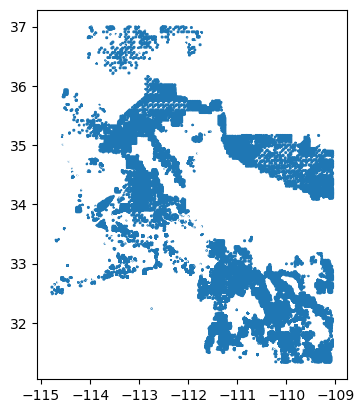

In [20]:
merged_data_filtered.boundary.plot()

In [21]:
wells=wells.to_crs(merged_data_filtered.crs)

<Axes: >

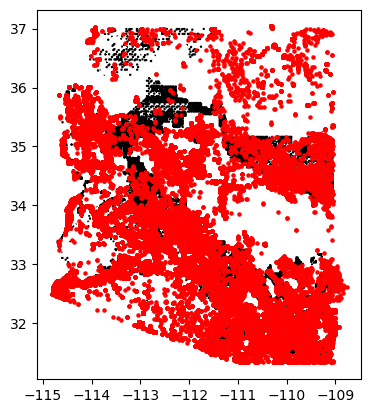

In [29]:
base = leases.plot(color='white', edgecolor='black')

wells.plot(ax=base, marker='o', color='red', markersize=5)

In [35]:
import plotly.express as px

fig=px.line(merged_data_filtered, x='date',y='depth')
fig.show()

In [38]:
depthseries=merged_data_filtered['depth']
depthseries.dropna()
depthseries=depthseries.dropna()
depthseries

38        96.8
38       113.2
63       475.0
73       167.7
73       173.6
         ...  
23078     12.0
23081     15.0
23107     16.0
23107      8.0
23108     13.0
Name: depth, Length: 18428, dtype: float64

In [39]:
dateseries=merged_data_filtered['date']
dateseries.dropna()
dateseries=dateseries.dropna()
dateseries

38       1971-12-17 00:00:00
38       2001-07-10 00:00:00
63       2001-05-23 00:00:00
73       1956-08-22 00:00:00
73       1975-01-21 00:00:00
                ...         
23072    1961-12-01 00:00:00
23081    1961-12-01 00:00:00
23107    1955-12-01 00:00:00
23107    1953-06-01 00:00:00
23108    1952-02-01 00:00:00
Name: date, Length: 19568, dtype: object